Final Project
Titanic - Machine Learning from Disaster
https://www.kaggle.com/c/titanic (Links to an external site.) 

Dec 18, 2021 - Final submission deadline.

Guideline for this class,

1. Top 10% teams worldwide as of 11:59pm on Dec 18, 2021 will get A in this class.
2. Feature engineering: create new features from the raw data
3. Supervised learning models: Choose 2 supervised learning models from W3, W4, W5
4. Advanced models: choose 1 from XGBoost W12 or Neural Network W13 or Deep learning W14 to build your supervised learning models
5. Model evaluation: For each of the supervised learning models, evaluate the model using the techniques from W10
6. If data size is too big and your model is too slow, feel free to choose small set for your project.
7. Your jupyter submission should be in an article quality. Do NOT print huge data set in the notebook. Use head(). Use plotting to visualize your analysis and results. Use markdown to write your comments.
8. If you are not in the top 10% teams worldwide, your score is based on completeness on every step as described above.
9. Submit in HTML and ipynb format on canvas

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date
from sklearn import model_selection
import seaborn as sns

# Data loading and analysis

In [2]:
train_data = r'titanic/train.csv'

In [3]:
df_train = pd.read_csv(train_data, header= 0)
print(df_train.shape)
df_train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = r'titanic/test.csv'

In [5]:
df_test = pd.read_csv(test_data, header= 0)
print(df_test.shape)
df_test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Feature engineering

## Create new features

- Create "Title" based on the title provided in the person name 
- Create "FamilySize" based on the parch and sibsp
- Create "CabinClass" based on the cabin prefix (A, B, C, Unknown)

### New feature: Title

In [6]:
def create_feature_title(df):
    names = df['Name'].str.split(",", expand=True)[1]
    df['Title'] = names.str.split(".", expand=True)[0]
    df['Title'] = df['Title'].str.strip()
    df['Title'] = df['Title'].str.replace('Ms', 'Miss')
    df['Title'] = df['Title'].str.replace('Mlle|Mme|Lady|the Countess', 'Mrs')
    df['Title'] = df['Title'].str.replace('Sir', 'Mr')
    # Change from Jonkheer, Dr, Col, Capt, Major, Rev, Don to Mr or Mrs based on sex
    df.loc[df['Title'].str.match('Jonkheer|Dr|Col|Capt|Major|Rev|Don') & df['Sex'].str.match('male'), 'Title'] = 'Mr'
    df.loc[df['Title'].str.match('Jonkheer|Dr|Col|Capt|Major|Rev|Don') & df['Sex'].str.match('female'), 'Title'] = 'Mrs'    
    return df
df_train = create_feature_title(df_train)
df_test = create_feature_title(df_test)
df_train['Title'].value_counts()

/Users/sukritisingh/anaconda3/envs/CS675/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


Mr        537
Miss      183
Mrs       131
Master     40
Name: Title, dtype: int64

In [7]:
df_test[df_test.Title=='Miss'].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,Miss
18,910,3,"Ilmakangas, Miss. Ida Livija",female,27.0,1,0,STON/O2. 3101270,7.9250,NaN,S,Miss
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C,Miss
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S,Miss
37,929,3,"Cacic, Miss. Manda",female,21.0,0,0,315087,8.6625,NaN,S,Miss


### New feature: Family size

In [8]:
def create_feature_family_size(df):
    df['FamilySize'] = df['Parch'] + df['SibSp']
    return df
df_train = create_feature_family_size(df_train)
df_test = create_feature_family_size(df_test)

### New feature: CabinClass

In [9]:
def create_feature_cabin_class(df):
    df['CabinClass'] = df['Cabin']
    df['CabinClass'].fillna('N', inplace=True)
    df['CabinClass'] = df['CabinClass'].astype(str).str[0]
    return df
df_train = create_feature_cabin_class(df_train)
df_test = create_feature_cabin_class(df_test)
df_train['CabinClass'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: CabinClass, dtype: int64

In [10]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,CabinClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,N
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,N


In [11]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,CabinClass
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0,N
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,1,N
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0,N
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,0,N
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2,N


## Handle missing data

In [12]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
FamilySize       0
CabinClass       0
dtype: int64

In [13]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
FamilySize       int64
CabinClass      object
dtype: object

In [14]:
def data_cleanup(df):
    # Option 1: impute missing age data by mean
    # df['Age'] = df['Age'].fillna(df_train['Age'].mean())
    # Option 2: impute missing age data using mean within each title group
    df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))
    # Similar options for Fare
    # df['Fare'] = df['Fare'].fillna(df_train['Fare'].median())
    df['Fare'] = df.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))
    if 'Cabin' in df.columns:
        df = df.drop(columns=['Cabin'])
    df['Embarked'] = df['Embarked'].fillna(df_train['Embarked'].mode()[0])
    return df
df_train = data_cleanup(df_train)
df_test = data_cleanup(df_test)

In [15]:
df_train.isnull().sum().sum()

0

In [16]:
df_test.isnull().sum().sum()

0

## Create more features

- Create "FareCategory" to group the fares
- Create "AgeGroup" to group the age

### New feature: Fare category

In [17]:
def create_feature_fare_category(df):
    # df['FareCategory'] = pd.cut(x=df['Fare'], bins=[0, 10, 50, 100, 200, 1000], labels=['verylow', 'low', 'medium', 'high', 'veryhigh'])
    df['FareCategory'] = pd.cut(x=df['Fare'], bins=[-1, 10, 50, 100, 200, 1000], labels=[0, 1, 2, 3, 4])
    df['FareCategory'] = df['FareCategory'].astype(np.int64)
    return df
df_train = create_feature_fare_category(df_train)
df_test = create_feature_fare_category(df_test)
df_test['FareCategory'].value_counts()

1    182
0    156
2     49
4     18
3     13
Name: FareCategory, dtype: int64

### New feature: Age group

In [18]:
def create_feature_age_group(df):
    # df['AgeGroup'] = pd.cut(x=df['Age'], bins=[0, 9, 18, 25, 40, 100], labels=['child', 'teen', 'young', 'adult', 'aged'])
    df['AgeGroup'] = pd.cut(x=df['Age'], bins=[0, 9, 18, 25, 40, 100], labels=[0, 1, 2, 3, 4])
    df['AgeGroup'] = df['AgeGroup'].astype(np.int64)
    return df
df_train = create_feature_age_group(df_train)
df_test = create_feature_age_group(df_test)
df_train['AgeGroup'].value_counts()

3    400
2    198
4    150
1     77
0     66
Name: AgeGroup, dtype: int64

## Data Preprocessing

In [19]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,CabinClass,FareCategory,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1,N,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1,C,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,N,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1,C,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0,N,0,3


In [20]:
df_train['Sex'] = (df_train['Sex']=='female').astype(np.int64)
df_test['Sex'] = (df_test['Sex']=='female').astype(np.int64)

In [21]:
df_train.drop(columns=['PassengerId', 'Survived']).describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,FareCategory,AgeGroup
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.371684,0.523008,0.381594,32.204208,0.904602,0.884400,2.551066
std,0.836071,0.477990,13.252921,1.102743,0.806057,49.693429,1.613459,0.913748,1.096689
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400,0.000000,0.000000,2.000000
50%,3.000000,0.000000,30.000000,0.000000,0.000000,14.454200,0.000000,1.000000,3.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,3.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,10.000000,4.000000,4.000000


In [22]:
df_test.drop(columns=['PassengerId']).describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,FareCategory,AgeGroup
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,29.740431,0.447368,0.392344,35.560845,0.839713,0.935407,2.602871
std,0.841838,0.481622,12.973485,0.896760,0.981429,55.856972,1.519072,1.000307,1.057208
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,2.000000
50%,3.000000,0.000000,29.000000,0.000000,0.000000,14.454200,0.000000,1.000000,3.000000
75%,3.000000,1.000000,36.875000,1.000000,0.000000,31.471875,1.000000,1.000000,3.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,10.000000,4.000000,4.000000


**[Observation]** The numeric data between train and test are similarly distributed.

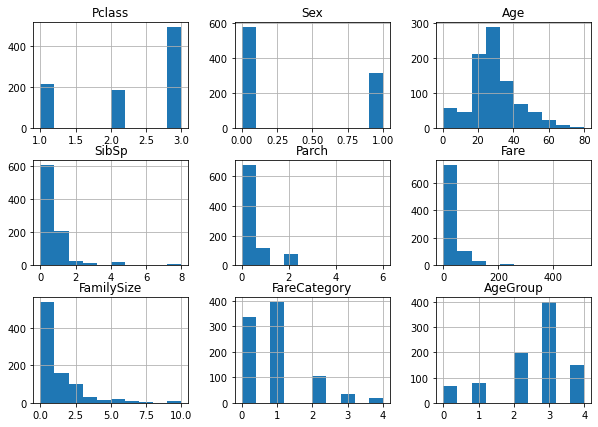

In [23]:
fig = df_train.drop(columns=['PassengerId', 'Survived']).hist(figsize=(10, 7))

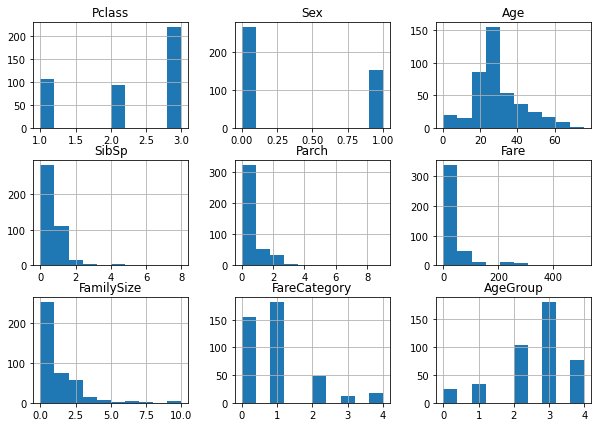

In [24]:
fig = df_test.drop(columns=['PassengerId']).hist(figsize=(10, 7))

**[Observation]** SibSp, Parch, Fare, FamilySize are non-uniformly distributed => preprocess using log or grouping

In [25]:
def preprocess_data(df):
    log_feats = ['FamilySize', 'Fare']
    for f in log_feats:
        df[f + '_log'] = np.log2(1 + df[f])
    df['Age'] = df['Age'] / 50
    return df
df_train = preprocess_data(df_train)
df_test = preprocess_data(df_test)

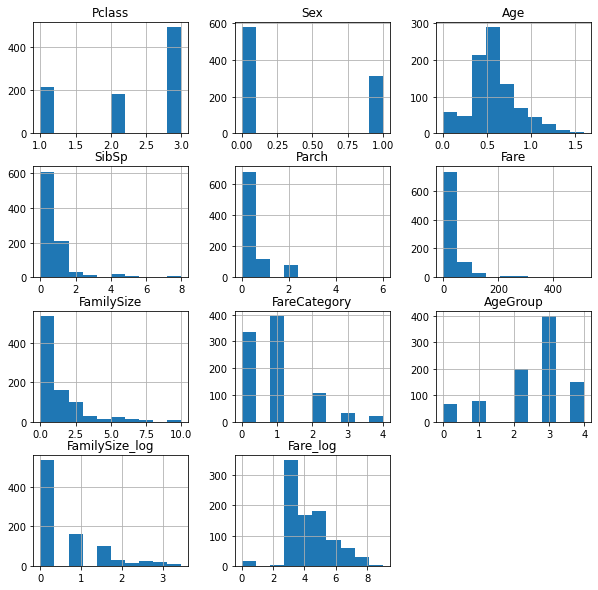

In [26]:
fig = df_train.drop(columns=['PassengerId', 'Survived']).hist(figsize=(10, 10))

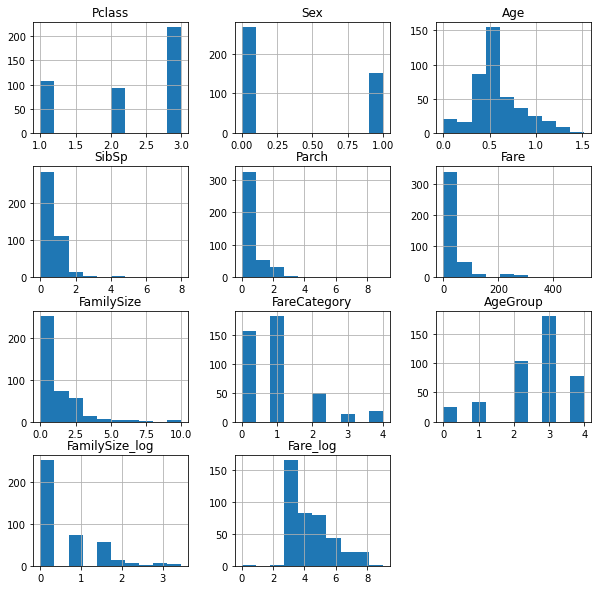

In [27]:
fig = df_test.drop(columns=['PassengerId']).hist(figsize=(10, 10))

In [28]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,CabinClass,FareCategory,AgeGroup,FamilySize_log,Fare_log
0,1,0,3,"Braund, Mr. Owen Harris",0,0.44,1,0,A/5 21171,7.2500,S,Mr,1,N,0,2,1.0,3.044394
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.76,1,0,PC 17599,71.2833,C,Mrs,1,C,2,3,1.0,6.175590
2,3,1,3,"Heikkinen, Miss. Laina",1,0.52,0,0,STON/O2. 3101282,7.9250,S,Miss,0,N,0,3,0.0,3.157852
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.70,1,0,113803,53.1000,S,Mrs,1,C,2,3,1.0,5.757557
4,5,0,3,"Allen, Mr. William Henry",0,0.70,0,0,373450,8.0500,S,Mr,0,N,0,3,0.0,3.177918


## Feature selection

In [29]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Title', 'FamilySize',
       'CabinClass', 'FareCategory', 'AgeGroup', 'FamilySize_log', 'Fare_log'],
      dtype='object')

In [30]:
# Drop features
# drop_feats = ['SibSp', 'Parch', 'Fare', 'FamilySize', 'CabinClass', 'Name', 'Ticket']
drop_feats = ['Name', 'Age', 'Ticket', 'Fare', 'CabinClass', 'FamilySize_log', 'Fare_log']
df_train = df_train.drop(columns=drop_feats)
df_test = df_test.drop(columns=drop_feats)

In [31]:
col_groups = df_train.drop(columns=['PassengerId' , 'Survived'], axis=1).columns.to_series().groupby(df_train.dtypes.astype(str)).groups
col_groups

{'int64': ['Pclass', 'Sex', 'SibSp', 'Parch', 'FamilySize', 'FareCategory', 'AgeGroup'], 'object': ['Embarked', 'Title']}

In [32]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
features_objects = df_train[col_groups['object']].values
ohe.fit(features_objects)

OneHotEncoder()

In [33]:
def prepare_data(df):
    # features_numeric = df[[*col_groups['int64'], *col_groups['float64']]].values
    features_numeric = df[[*col_groups['int64']]].values
    features_objects = df[[*col_groups['object']]].values
    features_ohe = ohe.transform(features_objects).toarray()
    features = np.concatenate((features_numeric, features_ohe), axis=1)
    # feature_names = [*col_groups['int64'], *col_groups['float64'], 
    #                  *ohe.get_feature_names([*col_groups['object']]).tolist()]
    feature_names = [*col_groups['int64'], 
                     *ohe.get_feature_names([*col_groups['object']]).tolist()]
    return features, feature_names

In [34]:
features, feature_names = prepare_data(df_train)

In [35]:
feature_names

['Pclass',
 'Sex',
 'SibSp',
 'Parch',
 'FamilySize',
 'FareCategory',
 'AgeGroup',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs']

In [36]:
targets = df_train['Survived'].values
targets.shape

(891,)

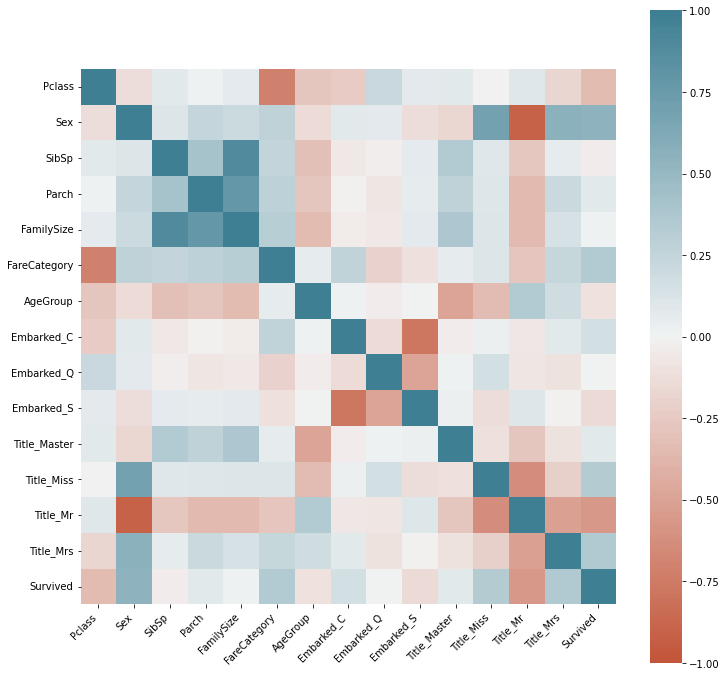

In [37]:
df_features = pd.DataFrame(np.concatenate((features, np.expand_dims(targets, axis=1)), axis=1), 
                           columns=[*feature_names, 'Survived'])
corr = df_features.corr()
plt.figure(figsize=(12, 12))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

In [38]:
features_submission, _ = prepare_data(df_test)

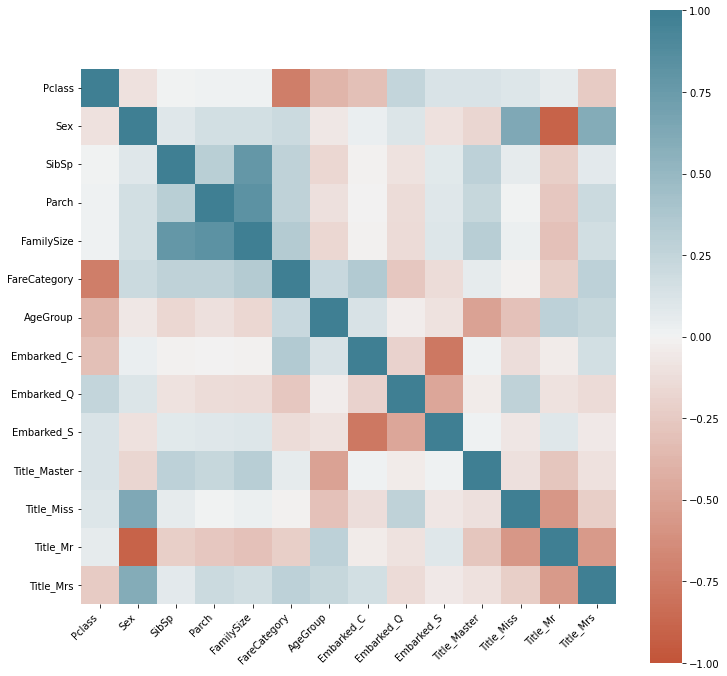

In [39]:
df_features = pd.DataFrame(features_submission, columns=feature_names)
corr = df_features.corr()
plt.figure(figsize=(12, 12))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

In [40]:
def prepare_submission(preds):
    submission_data = r'titanic/gender_submission.csv'
    df_sub = pd.read_csv(submission_data, header = 0)
    df_sub['Survived'].update(pd.Series(preds))
    return df_sub

# Model training

In [41]:
import shap

In [42]:
def evaluate(y_test, preds):
    from sklearn.metrics import precision_score, recall_score, accuracy_score
    print("Precision = {}".format(precision_score(y_test, preds, average='macro')))
    print("Recall = {}".format(recall_score(y_test, preds, average='macro')))
    print("Accuracy = {}".format(accuracy_score(y_test, preds)))

## Partition Data

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(features, targets, test_size=0.2, random_state=88)

In [45]:
print(X_train.shape, y_train.sum())
print(X_test.shape, y_test.sum())

(712, 14) 280
(179, 14) 62


## Data Normalization

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [47]:
scaler = StandardScaler()
scaler.fit(features)
X_train_normed = scaler.transform(X_train)
X_test_normed = scaler.transform(X_test)
features_submission_normed = scaler.transform(features_submission)

In [62]:
scaler = MinMaxScaler()
scaler.fit(features)
X_train_minmax = scaler.transform(X_train)
X_test_minmax = scaler.transform(X_test)
features_submission_minmax = scaler.transform(features_submission)

## Support Vector Classification

In [63]:
from sklearn.svm import SVC

In [64]:
svc = SVC(kernel='linear')

In [65]:
from sklearn.decomposition import PCA, KernelPCA 
pca = PCA(n_components=13)
pca.fit(X_train_normed)
X_train_svc = pca.transform(X_train_normed) 
X_test_svc = pca.transform(X_test_normed) 
features_submission_svc = pca.transform(features_submission_normed) 

In [66]:
svc.fit(X_train_svc, y_train)

SVC(kernel='linear')

In [67]:
preds = svc.predict(X_test_svc)
evaluate(y_test, preds)

Precision = 0.8250647109577222
Recall = 0.8116211745244004
Accuracy = 0.8379888268156425


In [69]:
preds = svc.predict(features_submission_svc)
df_sub = prepare_submission(preds)
df_sub.to_csv('titanic/submission_svc.csv', index=False)

## KNN

In [70]:
#  create a classifier using k-Nearest Neighbors algorithm.
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
# neighbors = np.arange(1,15)
# neighbors = [5, 10, 15, 20, 25]
neighbors = [2, 4, 5, 10, 15, 20, 25]
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    print(k)
    
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

2
4
5
10
15
20
25


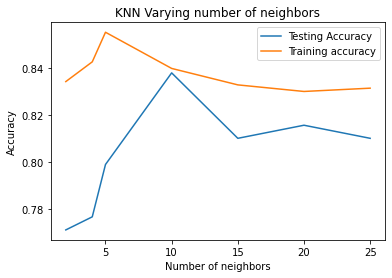

In [71]:
#Generate plot
plt.title('KNN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [72]:
knn = KNeighborsClassifier(n_neighbors=10)

In [73]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [74]:
preds = knn.predict(X_test)
evaluate(y_test, preds)

Precision = 0.8250647109577222
Recall = 0.8116211745244004
Accuracy = 0.8379888268156425


In [75]:
preds = knn.predict(features_submission)
df_sub = prepare_submission(preds)
df_sub.to_csv('titanic/submission_knn.csv', index=False)

## Random Forest Classification

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [78]:
preds = rfc.predict(X_test)
evaluate(y_test, preds)

Precision = 0.80493017953833
Recall = 0.7950096498483595
Accuracy = 0.8212290502793296


In [79]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [25, 50, 75],
    'max_features': [2, 3, 5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

In [80]:
rfc_grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                               cv = 3, n_jobs = -1, verbose = 1)

In [81]:
# Fit the grid search to the data
rfc_grid_search.fit(X_train, y_train)
rfc_grid_search.best_params_

Fitting 3 folds for each of 243 candidates, totalling 729 fits


{'bootstrap': False,
 'max_depth': 25,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [82]:
preds = rfc_grid_search.best_estimator_.predict(X_test)
evaluate(y_test, preds)

Precision = 0.8088888888888889
Recall = 0.7874276261373035
Accuracy = 0.8212290502793296


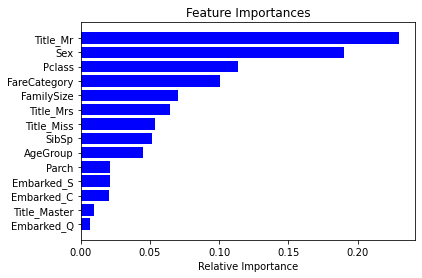

In [83]:
importances = rfc_grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[-15:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

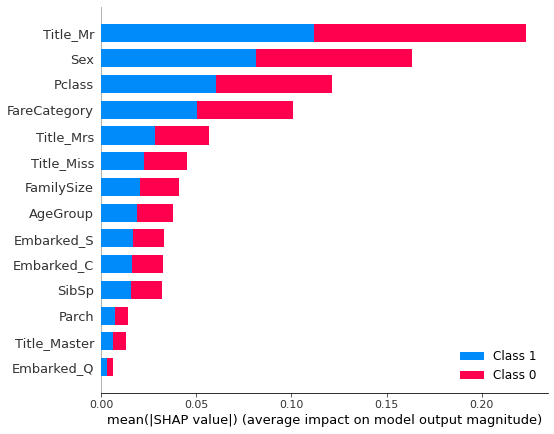

In [84]:
shap_values = shap.TreeExplainer(rfc_grid_search.best_estimator_).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=feature_names)

In [85]:
preds = rfc_grid_search.predict(features_submission)
df_sub = prepare_submission(preds)
df_sub.to_csv('titanic/submission_rfc.csv', index=False)

### Feature selection (based on SHAP values, and redundancy)

In [86]:
feats = ['Sex', 'Pclass', 'FareCategory', 'FamilySize', 'AgeGroup']
indices = [i for i, f in enumerate(feature_names) if f in feats]
indices

[0, 1, 4, 5, 6]

In [87]:
X_train_subset = X_train[:, indices]
X_test_subset = X_test[:, indices]
features_submission_subset = features_submission[:, indices]

In [88]:
rfc = RandomForestClassifier(**rfc_grid_search.best_params_)
rfc.fit(X_train_subset, y_train)
preds = rfc.predict(X_test_subset)
evaluate(y_test, preds)

Precision = 0.8168613357292602
Recall = 0.7917011304108078
Accuracy = 0.8268156424581006


In [89]:
preds = rfc.predict(features_submission_subset)
df_sub = prepare_submission(preds)
df_sub.to_csv('titanic/submission_rfc_subset.csv', index=False)

## XGBoost

In [90]:
from xgboost import XGBClassifier

In [91]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic', 
                    verbosity=1, use_label_encoder=False, eval_metric='logloss')

In [92]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.02, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=1)

In [93]:
preds = xgb.predict(X_test)
evaluate(y_test, preds)

Precision = 0.8336397058823529
Recall = 0.8002481389578164
Accuracy = 0.8379888268156425


In [94]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [25, 50, 75],
    'min_child_weight': [1],
    'gamma': [0.5, 1],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.9, 1.0],
    'max_depth': [10, 20, 50, 100]
    }

In [95]:
# Fit the grid search to the data
xgb_grid_search = GridSearchCV(estimator = xgb, param_grid = param_grid, 
                          cv = 3, n_jobs = 3, verbose = 1)
xgb_grid_search.fit(X_train, y_train)
xgb_grid_search.best_params_

Fitting 3 folds for each of 96 candidates, totalling 288 fits


{'colsample_bytree': 0.9,
 'gamma': 0.5,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 25,
 'subsample': 1.0}

In [96]:
preds = xgb_grid_search.predict(X_test)
evaluate(y_test, preds)

Precision = 0.8386583888552392
Recall = 0.8083126550868487
Accuracy = 0.8435754189944135


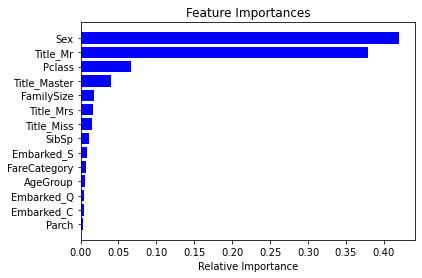

In [97]:
importances = xgb_grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[-15:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


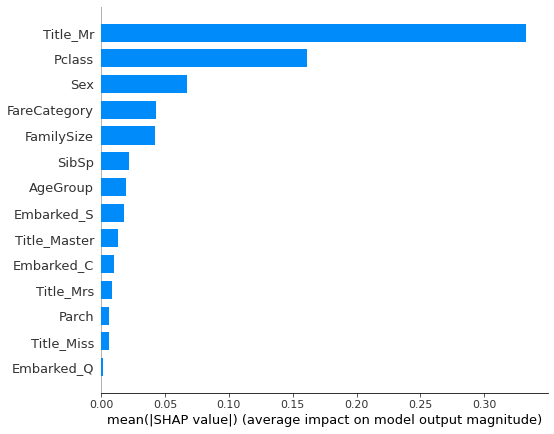

In [98]:
shap_values = shap.TreeExplainer(xgb_grid_search.best_estimator_).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=feature_names)

In [99]:
preds = xgb_grid_search.predict(features_submission)
df_sub = prepare_submission(preds)
df_sub.to_csv('titanic/submission_xgboost.csv', index=False)

### Feature selection (based on SHAP values, and redundancy)

In [108]:
feats = ['Sex', 'Pclass', 'FareCategory', 'FamilySize', 'AgeGroup']
indices = [i for i, f in enumerate(feature_names) if f in feats]
indices

[0, 1, 4, 5, 6]

In [109]:
X_train_subset = X_train[:, indices]
X_test_subset = X_test[:, indices]
features_submission_subset = features_submission[:, indices]

In [111]:
xgb = XGBClassifier(**xgb_grid_search.best_params_)
xgb.fit(X_train_subset, y_train)
preds = xgb.predict(X_test_subset)
evaluate(y_test, preds)

[17:20:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Precision = 0.8250647109577222
Recall = 0.8116211745244004
Accuracy = 0.8379888268156425


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


In [112]:
preds = xgb.predict(features_submission_subset)
df_sub = prepare_submission(preds)
df_sub.to_csv('titanic/submission_xgboost_subset.csv', index=False)

## Deep Learning

In [113]:
import keras

In [114]:
import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import normalize

In [115]:
model = Sequential()

2021-12-18 17:21:03.112238: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [116]:
model.add(Dense(32, activation=tf.nn.relu)) 
model.add(Dense(24, activation=tf.nn.relu))  
model.add(Dense(24, activation=tf.nn.relu))  
model.add(Dense(24, activation=tf.nn.relu))  

In [117]:
model.add(Dense(2, activation=tf.nn.softmax))

In [118]:
model.compile(optimizer='sgd', # usually we use 'adam' as default to start with. Now we use sgd to compare with last week's model
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])  # what to track

In [129]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [130]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                792       
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 24)                600       
                                                                 
 dense_4 (Dense)             (None, 2)                 50        
                                                                 
Total params: 2,522
Trainable params: 2,522
Non-trainable params: 0
_________________________________________________________________


In [131]:
pred=model.predict(X_test)
val_loss, val_acc = model.evaluate(X_test, y_test)  
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

6/6 [==============================] - 0s 3ms/step - loss: 0.4336 - accuracy: 0.8156
0.43356531858444214
0.8156424760818481


In [132]:
preds = model.evaluate(features_submission)
df_sub = prepare_submission(preds)
df_sub.to_csv('titanic/submission_dnn.csv', index=False)

14/14 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


# Observations

Random forest classification with selection of best performing features (after grouping) outperformed all the other models on the challenge test dataset.